In [1]:
import sys

sys.path.append('..')

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.envs.gridworld import GridworldEnv

### Cliff Walking

In [3]:
env = CliffWalkingEnv()

In [4]:
env.reset()

env.render()
stp = env.step(0)
env.render()

stp = env.step(1)
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



## Gridworld

In [53]:
sns.set_style('white')

In [44]:
from IPython.display import clear_output
import time

In [408]:
# set up a new environment
shape = (5, 5)
env = GridworldEnv(shape=shape)

In [191]:
def generate_action():
  return np.random.randint(4)

#### Just a single step from the initial state

In [202]:
# set up parameters
n_iters = 10000
alpha = 0.1
gamma = 0.1

In [203]:
# initialize the value function
V = np.zeros((shape[0] * shape[1], ))

for i in range(n_iters):
  initial_state = env.reset()
  if initial_state in [0, len(V)-1]:
    continue
  action = generate_action()
  
  next_state, reward, done, _ = env.step(action)
  
  # update value function
  V[initial_state] += alpha * (reward + gamma * V[next_state] - V[initial_state])
  
#   clear_output()
#   env.render(mode='human')
#   time.sleep(1)

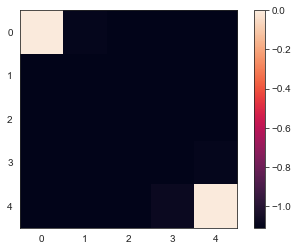

In [204]:
plt.imshow(V.reshape(shape))
plt.colorbar()

In [205]:
V.reshape(shape)

array([[ 0.        , -1.09775993, -1.11014699, -1.11108974, -1.11111008],
       [-1.10764694, -1.11003279, -1.11106174, -1.11110624, -1.11110093],
       [-1.11082856, -1.11108929, -1.11110614, -1.11106153, -1.11096213],
       [-1.11110026, -1.1111088 , -1.11106485, -1.10987681, -1.09703628],
       [-1.11111058, -1.11109677, -1.11031617, -1.08001274,  0.        ]])

#### Simulating the episode all the way through

In [228]:
from collections import defaultdict

In [416]:
# set up parameters
n_iters = 10000
alpha = 0.3
gamma = 0.1

In [417]:
deltas = defaultdict(list)

# initialize the value function
V = np.zeros((shape[0] * shape[1], ))

for i in range(n_iters):
  initial_state = env.reset()
  if initial_state in [0, len(V)-1]:
    continue
  while True:
    action = generate_action()  # defined by a policy
    next_state, reward, done, _ = env.step(action)
    
    # update value function
    before = V[initial_state]
    
    V[initial_state] += alpha * (reward + gamma * V[next_state] - V[initial_state])
    deltas[initial_state].append(np.abs(before - V[initial_state]))
    
    if done:
      break
    
    initial_state = next_state

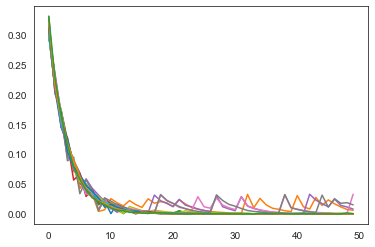

In [418]:
for trace in deltas.values():
  plt.plot(trace[:50])

In [419]:
V.reshape(shape)

array([[ 0.        , -1.08945293, -1.11017438, -1.11110248, -1.11111007],
       [-1.05752559, -1.1077768 , -1.11100304, -1.11110618, -1.11107905],
       [-1.1107782 , -1.11098933, -1.11110599, -1.11104373, -1.10905744],
       [-1.1110761 , -1.11110454, -1.11108177, -1.10768206, -1.08401179],
       [-1.11110948, -1.11109013, -1.1108296 , -1.0429694 ,  0.        ]])

In [420]:
done

True

In [421]:
next_state

24

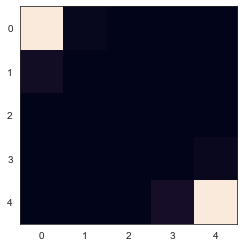

In [422]:
plt.imshow(V.reshape(shape))

## Try with a larger environment

In [325]:
# set up a new environment
shape = (25, 25)
env = GridworldEnv(shape=shape)

In [401]:
# set up parameters
n_iters = 100000
alpha = 0.25
gamma = 0.999

In [402]:
# initialize the value function
V = np.zeros((shape[0] * shape[1], ))

for i in range(n_iters):
  initial_state = env.reset()
  if initial_state in [0, len(V)-1]:
    continue
  action = generate_action()
  
  next_state, reward, done, _ = env.step(action)
  
  # update value function
  V[initial_state] += alpha * (reward + gamma * V[next_state] - V[initial_state])
  
#   clear_output()
#   env.render(mode='human')
#   time.sleep(1)

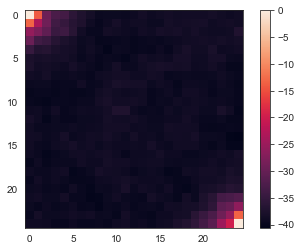

In [403]:
plt.imshow(V.reshape(shape))
plt.colorbar()